# Anonymized Dump of Thinking Machines Daily Check-Ins
*Exploratory Data Analysis (EDA) by Joseph L. Herrera*

# Importing Necessary Libraries and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dailycheckins.csv')
df.head(10)

,user,date,hours,project
0,loki,2020-10-14,1.00,culture
1,nick fury,2020-04-23,3.00,culture
2,riddler,2020-12-10,2.00,events
3,firestorm,2020-05-22,0.50,opsandadmin
4,firestorm,2020-05-22,0.50,opsandadmin
5,catwoman,2020-10-27,5.00,learning
6,aqualad,2020-10-14,8.00,project-22
7,green arrow,2020-05-04,2.00,opsandadmin
8,jean grey,2020-11-11,1.00,project-03
9,aquaman,2020-12-22,0.87,learning


# Get Initial Information about `dailycheckins`

## Check the number of entries and object types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72806 entries, 0 to 72805
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user     72806 non-null  object 
 1   date     72806 non-null  object 
 2   hours    72806 non-null  float64
 3   project  72806 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.2+ MB


We have 72806 samples with 4 columns, 3 of which are `object` types. We will convert the `date` column to a `datetime` object later.

## Check for missing values

In [4]:
df.isna().sum()

user       0
date       0
hours      0
project    0
dtype: int64

No missing values.

# Initial Cleaning

## Sort by `date`

I noticed when viewing the dataset that the values under the `date` column were not sorted in any order. Thus, I will first sort the entire dataset by the `date` column in ascending order.

In [5]:
df.sort_values(by='date', ignore_index=True, inplace=True)
df

,user,date,hours,project
0,spider-man,2020-01-01,3.92,geospatial
1,spider-man,2020-01-01,3.92,geospatial
2,daredevil,2020-01-02,2.00,learning
3,hawkeye,2020-01-02,1.00,opsandadmin
4,clayface,2020-01-02,1.00,project-30
...,...,...,...,...
72801,kingpin,2020-12-29,2.00,project-66
72802,hulk,2020-12-29,2.00,learning
72803,wonder woman,2020-12-29,4.00,learning
72804,kingpin,2020-12-31,2.50,learning


From sorting the dataset, I also found out that the entire dataset only spans the entire year of 2020 (upon reading the exam details again, I found out that it was already stated that the year is 2020, but this still a good way to find out the year of the entries in the dataset). I will then create a few columns that I might need to explore later on.

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date: date.month)
df['dayOfWeek'] = df['date'].apply(lambda date: date.dayofweek)
df['dayOfYear'] = df['date'].apply(lambda date: date.dayofyear)

## Usernames

Let's also see who the people are in the dataset. From this, we can also know if there are any inconsitencies in the entries for `user`, e.g., *joseph* and *Joseph* refer to the same user but there is an inconsistency in the use of capitalization.

In [7]:
users = sorted(df['user'].unique())
print(f'Total number of users: {len(users)}')
print(f'Users:\n{users}')

Total number of users: 106
Users:
['ant-man', 'aqualad', 'aquaman', 'artemis', 'bane', 'batman', 'beast', 'black adam', 'black lightning', 'black manta', 'black mask', 'black panther', 'black widow', 'blackfire', 'blue beetle', 'captain america', 'captain atom', 'captain marvel', 'catwoman', 'cheetah', 'clayface', 'constantine', 'cyborg', 'cyclops', 'daredevil', 'darkseid', 'deadpool', 'deadshot', 'deathstroke', 'doctor doom', 'doctor fate', 'doctor strange', 'drax', 'enchantress', 'falcon', 'firestorm', 'gambit', 'gamora', 'green arrow', 'green goblin', 'green lantern', 'groot', 'harley quinn', 'hawkeye', 'hawkgirl', 'hulk', 'huntress', 'iceman', 'iron fist', 'iron man', 'jean grey', 'jessica jones', 'joker', 'kid flash', 'kingpin', 'korg', 'loki', 'luke cage', 'magneto', 'mantis', 'martian manhunter', 'mera', 'miss martian', 'mysterio', 'mystique', 'nebula', 'nick fury', 'nightcrawler', 'nightwing', 'penguin', 'plastic man', 'professor x', 'psylocke', 'quicksilver', 'raven', 'red hoo

Aha! I guess people from TM are fans of superheroes! Also, we found no inconsistencies in capitalization. For the rest of this EDA, I will assume that the entries in the `user` column are employees of Thinking Machines.

# Insights from EDA

## Effects of COVID-19 on Work

In this section, we will explore the effects of lockdown due to the COVID-19 outbreak on the work productivity of Thinking Machines' projects. The assumption of this insight is that the data from `dailycheckins.csv` is real (or at least most of it). Thus, we would like to see how well they adapted to the new workstyle brought about by COVID-19. Did productivity decrease? Did the number of users decrease? Did it increase?

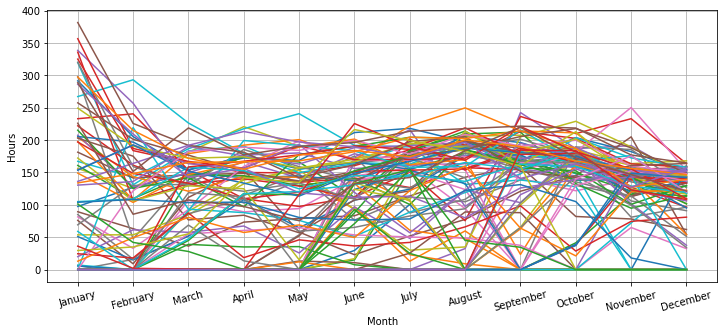

In [8]:
dfUserHours = df.groupby(['month', 'user'])['hours'].sum()
userHours = {user:[] for user in users}

for i in range(1, 13):
    for name in users:
        try:
            userHours[name] += [dfUserHours[i].loc[name]]
        except:
            userHours[name] += [0]
            
fig, ax = plt.subplots(1, 1, figsize=(12,5))
for user in userHours:
    ax.plot(range(1, 13), userHours[user], label=user)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=15)
ax.set_xlabel('Month')
ax.set_ylabel('Hours')
plt.grid(True)
plt.show()

It is still a bit messy, but you can notice an initial decline in total logged hours by the users during the earlier months, i.e., January to March. Then you could notice an increase in total logged hours during the months of August and September. Assuming that this is real data, then we could say that work productivity did indeed decrease due to COVID-19 (again, we are assuming that this is real data). Another assumption of this insight is that Thinking Machines has not implemented work-from-home prior to the lockdown and that projects are mostly done in their offices. With that being said, we could say that Thinking Machines was one of the many companies that was severly affect by the effects of COVID-19. However, this could be a false assumption given how messy the plot is. Let's try to simplify the above plot to get a better understanding of it and see if our initial insight still holds true.

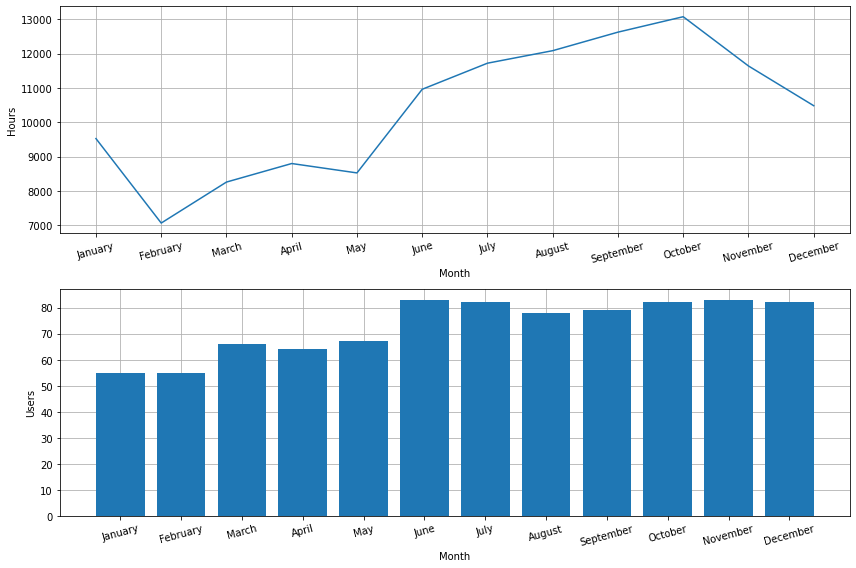

In [9]:
monthHours = {month:0 for month in range(1, 13)}
monthUsers = {month:0 for month in range(1, 13)}

for i in range(1, 13):
    monthHours[i] += dfUserHours[i].sum()
    for name in users:
        try:
            if dfUserHours[i].loc[name] != 0:
                monthUsers[i] += 1
        except:
            pass
            
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
for i, data in enumerate([monthHours, monthUsers]):
    if i == 0:
        ax[i].plot(list(data.keys()), list(data.values()), zorder=2)
        ax[i].set_ylabel('Hours')
    else:
        ax[i].bar(list(data.keys()), list(data.values()), zorder=2)
        ax[i].set_ylabel('Users')
    ax[i].set_xticks(range(1, 13))
    ax[i].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'], rotation=15)
    ax[i].set_xlabel('Month')
    ax[i].grid(True, zorder=1)
    
plt.tight_layout()
plt.show()

With this simplification, we come up with a counterargument to the previous insight: the decrease in total logged hours is in February, not March, and the increase in total logged hours occurs during the months of July to October. This tells us that work productivity did not decrease, but instead increased during the lockdown period. In fact, from the data alone, it is as if Thinking Machines did far better during lockdown than it did before lockdown (this insight could be better supported or invalidated if given data about the prior years). Maybe it is because their employees are working from home, and therefore saving them from time wasted due to commuting to work. Maybe it is also because they are working in an environment they are more comfortable with.

We also see a general increase in the number of users working on a project over the course of the year. One particular thing to notice here is that the number of unique users working on a project in each month is always less than the total number of users. This could probably mean that some employees are working part-time, rather than full-time. Maybe it could mean new people were hired throughout the course of the year.

I suggest that Thinking Machines continues to implement what they are currently implementing because of the given performance output. However, increased logged hours does not necessarily mean better work productivity. In fact, it could also be a sign of overworking. Comparing this trend to data from previous years could shed some light to this issue.

## Overworking Employees

Let's try to see the usual number of hours any user works on projects in any given day. This will give us an idea if there are any users who are working long hours and not getting enough rest. It is essential for employees to get enough rest. I also believe getting enough rest could increase productivity.

In [10]:
dfHourInt = df.groupby(['dayOfYear', 'user'])['hours'].sum().apply(lambda hour: int(round(hour, 0)))

loggedHours = range(max(dfHourInt.tolist())+1)
hourCount = {hour:0 for hour in map(str, loggedHours)}

for hour in dfHourInt.tolist():
    hourCount[str(hour)] += 1
    
for i in hourCount:
    print(f'{i:2}: {hourCount[i]}')

0 : 96
1 : 314
2 : 644
3 : 425
4 : 866
5 : 688
6 : 2061
7 : 2300
8 : 4301
9 : 1440
10: 1124
11: 439
12: 380
13: 154
14: 235
15: 106
16: 217
17: 69
18: 106
19: 35
20: 45
21: 21
22: 24
23: 14
24: 19
25: 3
26: 6
27: 4
28: 3
29: 1
30: 8
31: 3
32: 2
33: 2
34: 1
35: 1
36: 3
37: 0
38: 1
39: 0
40: 5
41: 1
42: 1
43: 0
44: 1
45: 0
46: 0
47: 0
48: 0
49: 1
50: 0
51: 0
52: 1
53: 0
54: 0
55: 0
56: 0
57: 0
58: 0
59: 0
60: 0
61: 0
62: 0
63: 0
64: 0
65: 0
66: 0
67: 0
68: 0
69: 0
70: 0
71: 0
72: 0
73: 0
74: 0
75: 0
76: 1
77: 1
78: 0
79: 0
80: 0
81: 0
82: 0
83: 0
84: 1


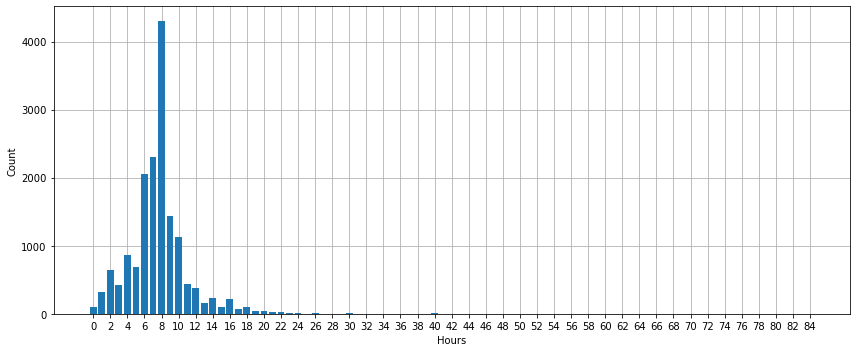

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.bar(list(hourCount.keys()), list(hourCount.values()), zorder=2)
ax.set_xlabel('Hours')
ax.set_ylabel('Count')
ax.set_xticks(range(0, max(dfHourInt.tolist())+1, 2))
ax.grid(True, zorder=1)
    
plt.tight_layout()
plt.show()

The mean is:

In [12]:
dfHourInt.mean()

7.715221961172252

The 50th, 75th, and 90th percentiles are:

In [13]:
dfHourInt.describe(percentiles=[0.5, 0.75, 0.9]).loc[['50%', '75%', '90%']]

50%     8.0
75%     9.0
90%    11.0
Name: hours, dtype: float64

Here we notice that the median logged hours is 8 hours, which is the usual number of hours a person works in a day. However, the 75th and 90th percentiles suggests to us that there may be a little bit of overworking. Long work hours and extended shifts contribute to worker fatigue. Studies show that such cases can result in increased levels of stress, poor eating habits, lack of physical activity and illness. That being said, it is highly suggested that Thinking Machines put a limit to the maximum number of allowable working hours in any given day unless absolutely necessary that they work long hours at a time. This would help promote a better work-life balance and an overall better well-being.

Beyond the 8-hour workday, we see some counts of daily logged hours spanning from 9 hours up to even 24 hours. At the very extreme, we see one count for 84 hours logged in one day. The counts for 9 to 24 hours hours would make sense, but the 84 hours does not. That being said, the unusually how logged hours could either mean some users forgot to time out when done with a project or are working on multiple tasks at the same time. If it is the case of multiple projects, then I believe that this is an inefficient way to work. Thus, I would highly suggest that Thinking Machines limit the number of projects assigned to each employee. This would help them focus on a few projects at a time and improve overall productivity.

## Work on Weekdays vs. Work on Weekends

Let us now see how work productivity is distributed in the week with respect to the total logged hours in the entire year. This gives us an idea if Thinking Machines let their employees work during weekends or not. I believe the weekend should be given as rest days to their employees to not add too much stress to their employees and make them fatigue. No work on weekends would also allow the employees to focus on other commitments (e.g., family matters) and hobbies (e.g., painting, music, etc.). I believe this would subconsciously promote a health family-work balance and a better lifestyle in general.

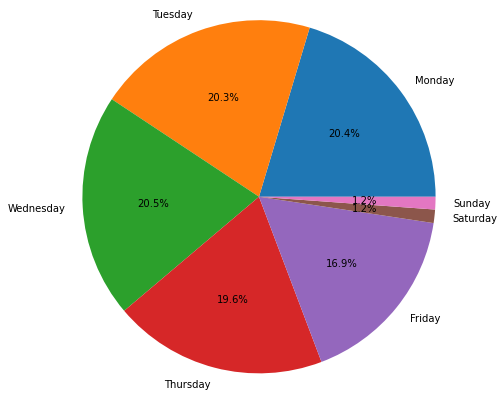

In [14]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = df.groupby('dayOfWeek')['hours'].sum()

plt.figure(figsize=(7,7))
plt.pie(hours, labels=days,
autopct='%1.1f%%')

plt.axis('equal')
plt.show()

We see that work is well distributed throughout the week, with a slight decrease on Friday (people can feel the weekend coming in fast). Furthermore, you could see that not much work is done during the weekends. This is great news to hear. I do hope that Thinking Machines continues this workstyle. I also read that one of Microsoft's Japanese branches once implemented a 4-day workweek as part of their "Work Life Choice Challenge." As a result, they noticed a 40% increase in sales per employee during that period. Therefore, I suggest that Thinking Machines implement a 4-day workweek and see if it is beneficial to the company and its employees.

Now let's see the distribution of the total logged hours for each day of the week on the projects. From this, we can determine which projects were done during weekdays and which were done during the weekends.

In [15]:
dayWork = df.groupby(['dayOfWeek', 'project'])['hours'].sum()
for i, day in enumerate(days):
    print(day)
    print(dayWork[i].sort_values(ascending=False).head(3))
    print()

Monday
project
opsandadmin    3748.277
project-22     2092.690
project-06     1867.640
Name: hours, dtype: float64

Tuesday
project
project-22    2363.09
project-03    1778.23
project-06    1603.10
Name: hours, dtype: float64

Wednesday
project
project-22    2529.12
project-03    1796.37
project-06    1661.58
Name: hours, dtype: float64

Thursday
project
project-22    2600.02
project-03    1854.41
project-06    1547.29
Name: hours, dtype: float64

Friday
project
project-22    2044.81
project-03    1477.35
project-06    1382.17
Name: hours, dtype: float64

Saturday
project
project-06    379.76
project-03    122.87
geospatial    101.74
Name: hours, dtype: float64

Sunday
project
project-06     314.42
project-03     144.08
opsandadmin     88.48
Name: hours, dtype: float64



From this, we see that `opsandadmin` is the one major project during Mondays. However, `project-22` seems to have the most logged hours during weekdays. Moreover, you could see that `project-06` and `project-03` consistenly log the most hours in each day. I do think that `project-06` and `project-03` are more like everyday-tasks than a project to be deployed.

## Biggest Project

In this section, we would like to determine the biggest projects of Thinking Machine in 2020. This will give us an insight on how much resources was spent and which projects required the most resources. However, these "resources" could mean different things (I'm not too familiar with running a business so bare with me):
- total logged hours
- number of people involved

### Biggest Project in Terms of Logged Hours

In some businesses, they prefer to pay their employees by the hour. Thus, those with more logged hours would get a higher salary. In a similar sense, those projects with the most logged hours would mean more resources spent to continue running. If Thinking Machines implements a per-hour salary, then that would help Thinking Machines better allocate resources to similar projects in the future. Therefore, let us see which projects are the "biggest" in terms of total logged hours.

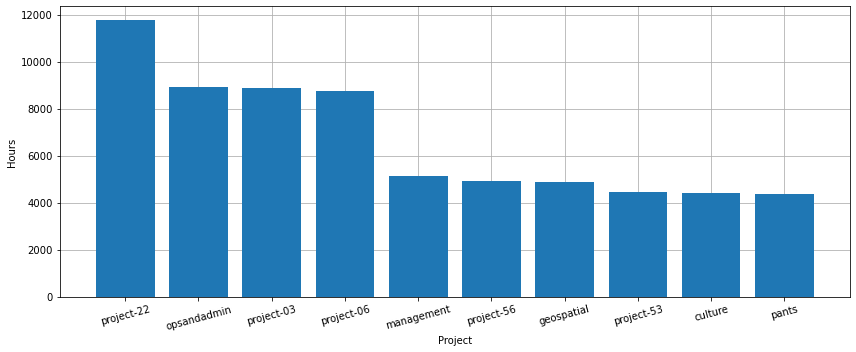

In [16]:
dfPLH10 = df.groupby('project')['hours'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.bar(dfPLH10.index, dfPLH10, zorder=2)

ax.tick_params(axis='x', rotation=15)
ax.set_xlabel('Project')
ax.set_ylabel('Hours')
ax.grid(True, zorder=1)

plt.tight_layout()
plt.show()

Here we notice that `project-22` is the bigggest project in terms of logged hours. If Thinking Machines implemented per-hour salary to their employees, then we could say the `project-22` required the most resources (money) to run the project. Not much can be said about `project-` projects because I do not know what they really are, but I do hope this could help Thinking Machines better estimate how much resources should be spent on future projects that are similar to these. You could also notice that `opsandadmin` and `management` are listed among the top 5 biggest projects. This could mean that a lot of resources are alloted to administrative projects that span all of Thinking Machines.

### Biggest Project in Terms of People Involved

Some businesses prefer to have a fixed salary to their employees instead of a per-hour salary. Therefore, getting more people involved would require more resources to continue runnning and managing. Thus, we would like to see which projects are considered to be the "biggest" in terms of the number of people involved.

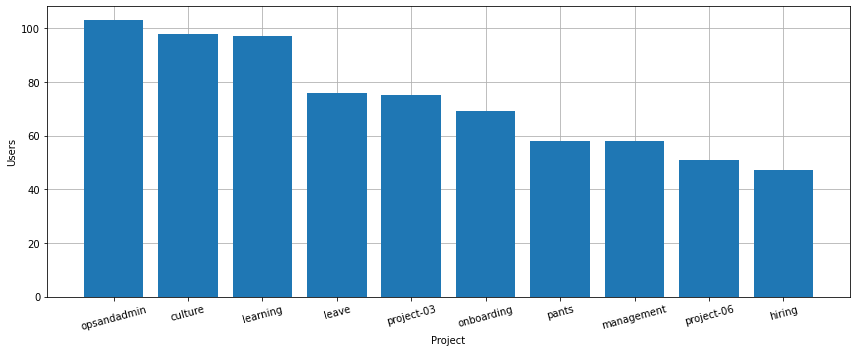

In [17]:
dfPMP10 = df.groupby('project')['user'].nunique().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.bar(dfPMP10.index, dfPMP10, zorder=2)

ax.tick_params(axis='x', rotation=15)
ax.set_xlabel('Project')
ax.set_ylabel('Users')
ax.grid(True, zorder=1)

plt.tight_layout()
plt.show()

We discover than `opsandadmin` requires the most number of people to run the project. However, I think `opsandadmin` is more of a required meeting involving the employees (maybe for peer evaluation, announcements, or some event involving the administration). Thus, I suppose it is inevitable to not join `opsandadmin`. You could also notice than a lot of users engage with the `culture` and `learning` project. From this, it is great to know that Thinking Machines tries to get all of their employees involved in projects/activities that focus on other aspects that could be beneficial to both the company and its employees, i.e., `culture`, `learning`, and `leave`.

# End of Exploratory Data Analysis
*Presented by Joseph L. Herrera*